# Introductory data analysis example - manual Python coding and ChatGPT code generation

### US Baby Names 2022

http://www.ssa.gov/oact/babynames/limits.html

### Download data file

In [1]:
import requests

# Download data file
url = 'https://raw.githubusercontent.com/OlekRomanko/teaching/master/datasets/yob2022.txt'
r = requests.get(url, allow_redirects=True)
open('yob2022.txt', 'wb').write(r.content)

407564

### Load file into a DataFrame

__Manually__

In [2]:
import pandas as pd

names2022 = pd.read_csv('yob2022.txt', names=['name', 'sex', 'births'])
names2022

,name,sex,births
0,Olivia,F,16573
1,Emma,F,14435
2,Charlotte,F,12891
3,Amelia,F,12333
4,Sophia,F,12310
...,...,...,...
31910,Zuberi,M,5
31911,Zydn,M,5
31912,Zylon,M,5
31913,Zymeer,M,5


__ChatGPT__

(insert to ChatGPT) I have a dataset with the following fields "name", "sex", "births". Here, "name" is first name; "sex" is gender M or F; "birth" is a number of babies born with a given first name. 

(insert to ChatGPT) Please read file with filename "yob2022.txt" and assign column names.

In [3]:
import pandas as pd

# Define the column names
column_names = ["name", "sex", "births"]

# Read the CSV file with specified column names
df = pd.read_csv("yob2022.txt", names=column_names)

# Display the first few rows of the DataFrame
print(df.head())

        name sex  births
0     Olivia   F   16573
1       Emma   F   14435
2  Charlotte   F   12891
3     Amelia   F   12333
4     Sophia   F   12310


### Total number of birth in year 2022 by sex

__Manually__

In [4]:
names2022.groupby('sex').births.sum()

sex
F    1628730
M    1733166
Name: births, dtype: int64

__ChatGPT__

(insert to ChatGPT) Please generate Python code that calculates number of males and females born.

In [5]:
# Calculate the number of males and females born
males = df[df['sex'] == 'M']['births'].sum()
females = df[df['sex'] == 'F']['births'].sum()

print("Number of males born:", males)
print("Number of females born:", females)

Number of males born: 1733166
Number of females born: 1628730


In [6]:
# Use groupby and sum to calculate the number of males and females born
gender_counts = df.groupby('sex')['births'].sum()

# Display the results
print("Number of males born:", gender_counts['M'])
print("Number of females born:", gender_counts['F'])

Number of males born: 1733166
Number of females born: 1628730


### Calculate proportions

__Manually__

Insert `prop` column for each group

In [7]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names2022 = names2022.groupby(['sex'], group_keys=False).apply(add_prop)

In [8]:
names2022

,name,sex,births,prop
0,Olivia,F,16573,0.010175
1,Emma,F,14435,0.008863
2,Charlotte,F,12891,0.007915
3,Amelia,F,12333,0.007572
4,Sophia,F,12310,0.007558
...,...,...,...,...
31910,Zuberi,M,5,0.000003
31911,Zydn,M,5,0.000003
31912,Zylon,M,5,0.000003
31913,Zymeer,M,5,0.000003


In [9]:
names2022.describe()

,births,prop
count,31915.000000,31915.000000
mean,105.339057,0.000063
std,568.037674,0.000336
min,5.000000,0.000003
25%,7.000000,0.000004
50%,12.000000,0.000007
75%,32.000000,0.000019
max,20456.000000,0.011803


Verify that the `prop` clumn sums to 1 within all the groups

In [10]:
import numpy as np

np.allclose(names2022.groupby(['sex']).prop.sum(), 1)

True

__ChatGPT__

(insert to ChatGPT) Design Python function to calculate proportion of names for each sex and insert new column "prop" with resulting numbers to the same dataframe.

In [11]:
def calculate_and_insert_name_proportions_inplace(dataset):
    """
    Calculate the proportion of names for each sex in the dataset and insert a new "prop" column.
    Modifies the input DataFrame in place.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "name", "sex", and "births".
    """
    # Calculate the total number of births for each sex
    total_births_by_sex = dataset.groupby('sex')['births'].transform('sum')
    
    # Calculate the proportion of each name for its respective sex
    dataset['prop'] = dataset['births'] / total_births_by_sex

# Assuming you've already read the CSV file and assigned column names as shown in a previous response
# If not, read the file again with column names as mentioned earlier

# Call the function to calculate and insert the name proportions in the same DataFrame
calculate_and_insert_name_proportions_inplace(df)

# Example: Print the dataset with the new "prop" column
print(df.head())

        name sex  births      prop
0     Olivia   F   16573  0.010175
1       Emma   F   14435  0.008863
2  Charlotte   F   12891  0.007915
3     Amelia   F   12333  0.007572
4     Sophia   F   12310  0.007558


(insert to ChatGPT) Please write code to verify that proportions sum up to one for each sex.

In [12]:
def verify_proportions_sum_to_one(dataset):
    """
    Verify that the proportions sum up to one for each sex in the dataset.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "name", "sex", "births", and "prop".
    """
    # Group the dataset by sex and calculate the sum of proportions for each sex
    sum_of_proportions = dataset.groupby('sex')['prop'].sum()
    
    # Print the result for each sex
    for sex, sum_prop in sum_of_proportions.items():
        print(f"Sum of proportions for {sex}: {sum_prop}")

# Assuming you've already read the CSV file, assigned column names, and inserted the "prop" column
# If not, make sure your DataFrame contains the "prop" column as calculated earlier

# Call the function to verify proportions sum up to one for each sex
verify_proportions_sum_to_one(df)

Sum of proportions for F: 1.0
Sum of proportions for M: 1.0


### Extract a subset of the data with the top 10 names for each sex

__Manually__

In [13]:
def get_top10(group):
    return group.sort_values(by='births', ascending=False)[:10]    
grouped = names2022.groupby(['sex'])
top10 = grouped.apply(get_top10)

In [14]:
top10.index = np.arange(len(top10))

In [15]:
top10

,name,sex,births,prop
0,Olivia,F,16573,0.010175
1,Emma,F,14435,0.008863
2,Charlotte,F,12891,0.007915
3,Amelia,F,12333,0.007572
4,Sophia,F,12310,0.007558
5,Isabella,F,11662,0.007160
6,Ava,F,11039,0.006778
7,Mia,F,11018,0.006765
8,Evelyn,F,9289,0.005703
9,Luna,F,8922,0.005478


In [16]:
top10.describe()

,births,prop
count,20.000000,20.000000
mean,12682.000000,0.007540
std,2968.043321,0.001709
min,8922.000000,0.005478
25%,10990.750000,0.006429
50%,11820.500000,0.006926
75%,13277.000000,0.008111
max,20456.000000,0.011803


__ChatGPT__

(insert to ChatGPT) Write code to extract a subset of the data with the top 10 names for each sex.

In [17]:
def get_top_names(dataset, n=10):
    """
    Extract the top n names for each sex from the dataset.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "name", "sex", "births", and "prop".
        n (int): The number of top names to extract for each sex (default is 10).
        
    Returns:
        DataFrame: A subset of the input dataset containing the top n names for each sex.
    """
    # Group the dataset by sex and sort each group by proportion in descending order
    top_names = dataset.groupby('sex').apply(lambda group: group.nlargest(n, 'prop')).reset_index(drop=True)
    
    return top_names

# Assuming you've already read the CSV file, assigned column names, inserted the "prop" column,
# and verified that proportions sum up to one for each sex as shown in previous responses
# If not, make sure your DataFrame contains the necessary columns and calculations.

# Call the function to get the top 10 names for each sex
top_names_subset = get_top_names(df, n=10)

# Example: Print the subset of data with the top names
print(top_names_subset)


         name sex  births      prop
0      Olivia   F   16573  0.010175
1        Emma   F   14435  0.008863
2   Charlotte   F   12891  0.007915
3      Amelia   F   12333  0.007572
4      Sophia   F   12310  0.007558
5    Isabella   F   11662  0.007160
6         Ava   F   11039  0.006778
7         Mia   F   11018  0.006765
8      Evelyn   F    9289  0.005703
9        Luna   F    8922  0.005478
10       Liam   M   20456  0.011803
11       Noah   M   18621  0.010744
12     Oliver   M   15076  0.008699
13      James   M   12028  0.006940
14     Elijah   M   11979  0.006912
15    William   M   11282  0.006509
16      Henry   M   11221  0.006474
17      Lucas   M   10909  0.006294
18   Benjamin   M   10842  0.006256
19   Theodore   M   10754  0.006205


### Compute proportions of names based on a first letter of the name

__Manually__

Aggregate all birth by the first letter from `name` column

In [18]:
# extract first letter from name column
get_first_letter = lambda x: x[0]
first_letters = names2022.name.map(get_first_letter)
first_letters.name = 'first_letter'

table = names2022.pivot_table('births', index=first_letters,
                          columns=['sex'], aggfunc=sum)

In [19]:
table.head()

sex,F,M
first_letter,,
A,267805,181030
B,47677,82315
C,91384,121524
D,41531,84077
E,154229,109922


Normalize the table

In [20]:
table.sum()

sex
F    1628730
M    1733166
dtype: int64

In [21]:
letter_prop = table / table.sum().astype(float)

__ChatGPT__

(insert to ChatGPT) Compute proportions of names based on a first letter of the name.

__wrong results__

In [22]:
def calculate_proportions_by_first_letter(dataset):
    """
    Compute the proportions of names based on the first letter of the name in the dataset.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "name", "sex", and "births".
        
    Returns:
        DataFrame: A DataFrame with columns "first_letter", "sex", "births", and "prop",
                    where "first_letter" is the first letter of the name.
    """
    # Extract the first letter of each name
    dataset['first_letter'] = dataset['name'].str[0]
    
    # Calculate the total number of births for each sex and first letter
    total_births_by_sex_and_letter = dataset.groupby(['sex', 'first_letter'])['births'].transform('sum')
    
    # Calculate the proportion of each name for its respective sex and first letter
    dataset['prop'] = dataset['births'] / total_births_by_sex_and_letter
    
    return dataset

# Assuming you've already read the CSV file and assigned column names as shown in a previous response
# If not, read the file again with column names as mentioned earlier

# Calculate proportions based on the first letter of the name
df_with_letter_proportions = calculate_proportions_by_first_letter(df)

# Example: Print the dataset with the calculated proportions
print(df_with_letter_proportions.head())


        name sex  births      prop first_letter
0     Olivia   F   16573  0.541831            O
1       Emma   F   14435  0.093595            E
2  Charlotte   F   12891  0.141064            C
3     Amelia   F   12333  0.046052            A
4     Sophia   F   12310  0.103164            S


(insert to ChatGPT) Aggregate all birth by the first letter from "name" column.

__wrong results__

In [23]:
def aggregate_births_by_first_letter(dataset):
    """
    Aggregate births by the first letter of names in the dataset.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "name" and "births".
        
    Returns:
        DataFrame: A DataFrame with columns "first_letter" and "total_births",
                    where "first_letter" is the first letter of the name and
                    "total_births" is the total number of births for names with the same first letter.
    """
    # Extract the first letter of each name
    dataset['first_letter'] = dataset['name'].str[0]
    
    # Group the dataset by the first letter and calculate the total births for each group
    aggregated_data = dataset.groupby('first_letter')['births'].sum().reset_index()
    
    return aggregated_data

# Assuming you've already read the CSV file and assigned column names as shown in a previous response
# If not, read the file again with column names as mentioned earlier

# Aggregate births by the first letter of the name
births_by_first_letter = aggregate_births_by_first_letter(df)

# Example: Print the aggregated data
print(births_by_first_letter)


   first_letter  births
0             A  448835
1             B  129992
2             C  212908
3             D  125608
4             E  264151
5             F   37607
6             G   93042
7             H  105138
8             I   78383
9             J  267514
10            K  181356
11            L  250518
12            M  275966
13            N  115712
14            O   71170
15            P   59735
16            Q    6920
17            R  156481
18            S  192898
19            T   84702
20            U    3306
21            V   45976
22            W   66525
23            X   12062
24            Y   18193
25            Z   57198


(insert to ChatGPT) Aggregate all birth by the first letter from "name" column grouping by sex and convert to proportions.

In [24]:
def aggregate_and_convert_to_proportions(dataset):
    """
    Aggregate births by the first letter of names in the dataset, grouping by sex,
    and convert the aggregated values to proportions within each sex.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "name", "sex", and "births".
        
    Returns:
        DataFrame: A DataFrame with columns "sex", "first_letter", and "prop",
                    where "sex" represents the sex, "first_letter" is the first letter of the name,
                    and "prop" is the proportion of births for names with the same first letter within each sex.
    """
    # Extract the first letter of each name
    dataset['first_letter'] = dataset['name'].str[0]
    
    # Group the dataset by sex and the first letter, and calculate the total births for each group
    grouped_data = dataset.groupby(['sex', 'first_letter'])['births'].sum().reset_index()
    
    # Calculate the proportion of births for each group within its respective sex
    grouped_data['prop'] = grouped_data.groupby('sex')['births'].transform(lambda x: x / x.sum())
    
    return grouped_data

# Assuming you've already read the CSV file and assigned column names as shown in a previous response
# If not, read the file again with column names as mentioned earlier

# Aggregate births by the first letter of the name, grouping by sex, and convert to proportions
births_by_first_letter_and_sex = aggregate_and_convert_to_proportions(df)

# Example: Print the aggregated data with proportions
print(births_by_first_letter_and_sex)


   sex first_letter  births      prop
0    F            A  267805  0.164426
1    F            B   47677  0.029273
2    F            C   91384  0.056108
3    F            D   41531  0.025499
4    F            E  154229  0.094693
5    F            F   17009  0.010443
6    F            G   41525  0.025495
7    F            H   55086  0.033821
8    F            I   46058  0.028278
9    F            J   71693  0.044018
10   F            K   86496  0.053106
11   F            L  118062  0.072487
12   F            M  147035  0.090276
13   F            N   59486  0.036523
14   F            O   30587  0.018780
15   F            P   36609  0.022477
16   F            Q    4033  0.002476
17   F            R   74273  0.045602
18   F            S  119324  0.073262
19   F            T   23514  0.014437
20   F            U     670  0.000411
21   F            V   34796  0.021364
22   F            W   16170  0.009928
23   F            X    4970  0.003051
24   F            Y    9139  0.005611
25   F      

### Plot proportion of boys and girls names starting in each letter

__Manually__

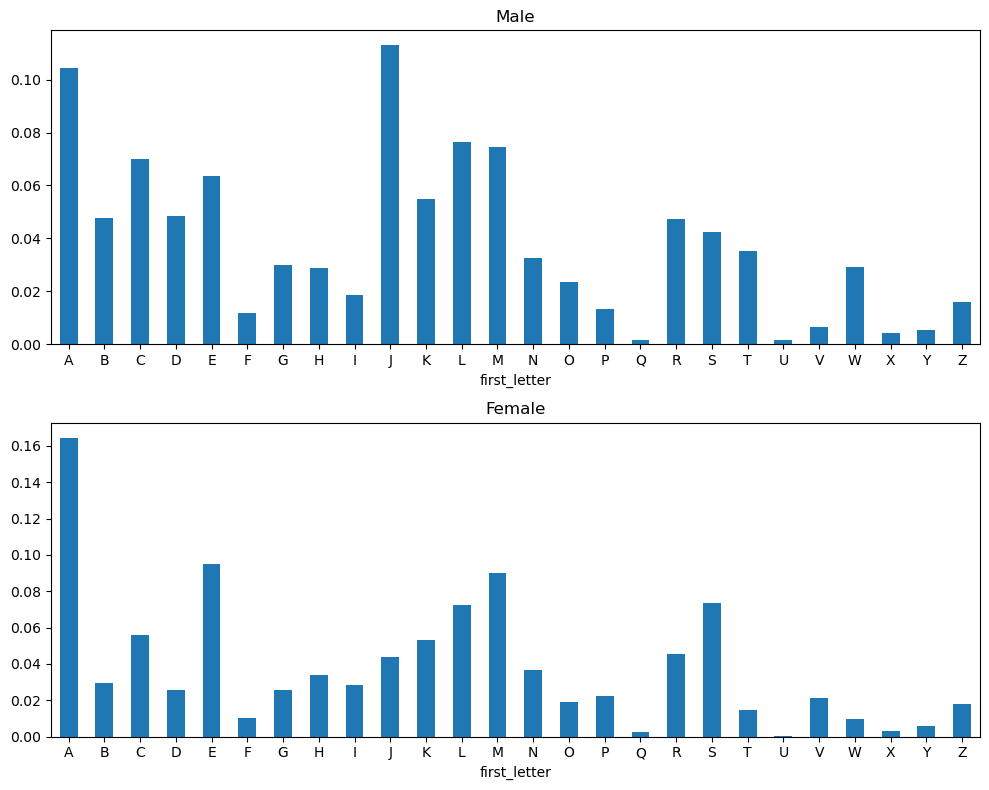

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)
fig.tight_layout()

__ChatGPT__

(insert to ChatGPT) Plot proportion of males and females names starting in each letter.

__wrong results__

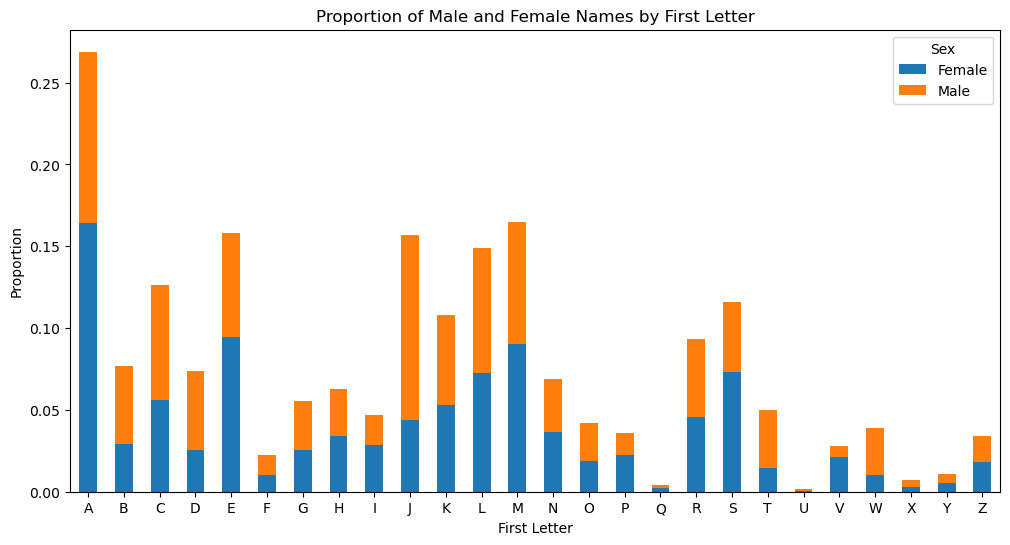

In [26]:
import matplotlib.pyplot as plt

def plot_proportion_of_names_by_letter(dataset):
    """
    Plot the proportion of male and female names starting with each letter.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "sex", "first_letter", and "prop".
    """
    # Pivot the dataset to have "first_letter" as columns and "prop" as values
    pivoted_data = dataset.pivot(index='first_letter', columns='sex', values='prop').fillna(0)
    
    # Create a bar plot for male and female proportions
    ax = pivoted_data.plot(kind='bar', stacked=True, figsize=(12, 6))
    
    # Customize the plot
    plt.title("Proportion of Male and Female Names by First Letter")
    plt.xlabel("First Letter")
    plt.ylabel("Proportion")
    plt.legend(title="Sex", labels=["Female", "Male"])
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()

# Assuming you've already read the CSV file, assigned column names, and calculated proportions as shown earlier
# If not, make sure your DataFrame contains the necessary columns and calculations.

# Call the function to plot the proportion of male and female names by first letter
plot_proportion_of_names_by_letter(births_by_first_letter_and_sex)


(insert to ChatGPT) On two plots, plot proportion of males and females names starting in each letter.

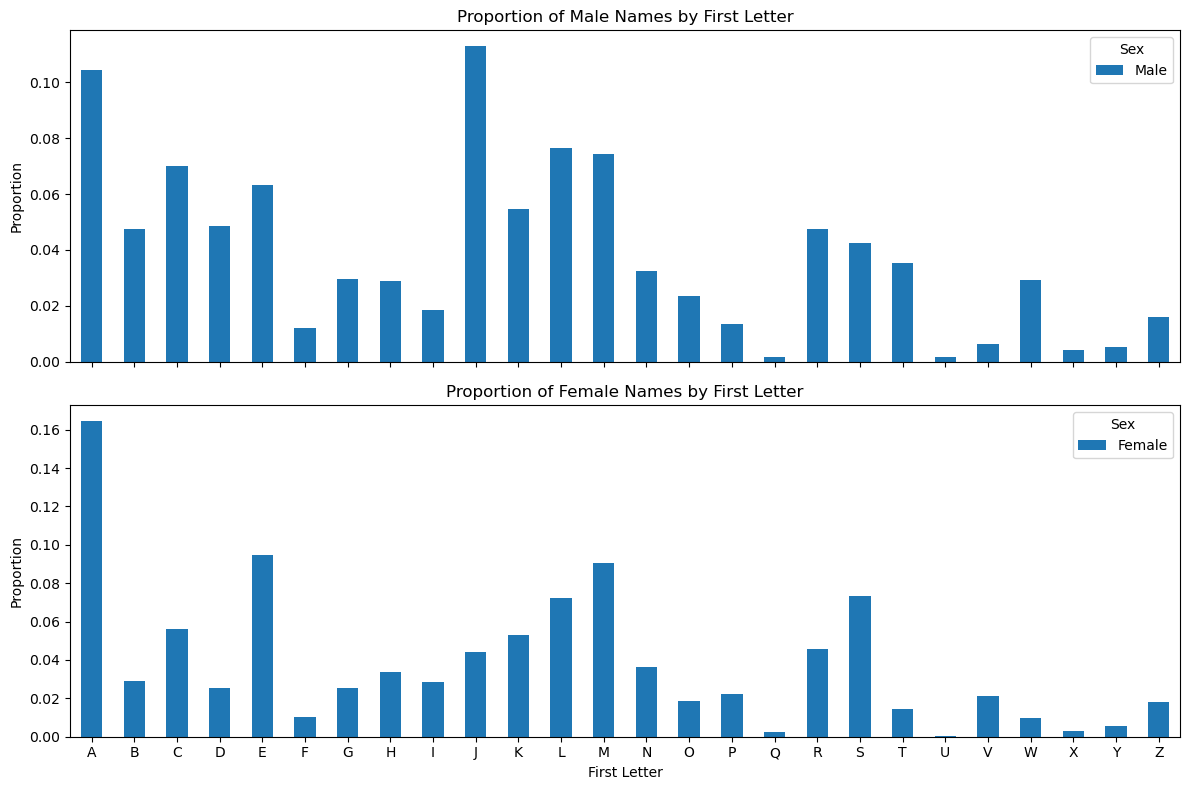

In [27]:
def plot_proportion_of_names_by_letter_separate(dataset):
    """
    Plot the proportion of male and female names starting with each letter on separate plots.
    
    Parameters:
        dataset (DataFrame): The dataset containing columns "sex", "first_letter", and "prop".
    """
    # Create separate DataFrames for male and female proportions
    male_data = dataset[dataset['sex'] == 'M']
    female_data = dataset[dataset['sex'] == 'F']
    
    # Pivot the datasets to have "first_letter" as columns and "prop" as values
    pivoted_male_data = male_data.pivot(index='first_letter', columns='sex', values='prop').fillna(0)
    pivoted_female_data = female_data.pivot(index='first_letter', columns='sex', values='prop').fillna(0)
    
    # Create two subplots
    fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)
    
    # Plot male proportions on the first subplot
    pivoted_male_data.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title("Proportion of Male Names by First Letter")
    axes[0].set_ylabel("Proportion")
    axes[0].legend(title="Sex", labels=["Male"])
    
    # Plot female proportions on the second subplot
    pivoted_female_data.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title("Proportion of Female Names by First Letter")
    axes[1].set_xlabel("First Letter")
    axes[1].set_ylabel("Proportion")
    axes[1].legend(title="Sex", labels=["Female"])
    
    # Customize the plots
    plt.xticks(rotation=0)
    
    # Adjust subplot spacing
    plt.tight_layout()
    
    # Show the plots
    plt.show()

# Assuming you've already read the CSV file, assigned column names, and calculated proportions as shown earlier
# If not, make sure your DataFrame contains the necessary columns and calculations.

# Call the function to plot the proportion of male and female names by first letter on separate plots
plot_proportion_of_names_by_letter_separate(births_by_first_letter_and_sex)